# Import Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

### Here is a sample of five rows of the data:

In [27]:
# Path to the dataset
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2022.csv")
 
# Printing the data
first_10_rows= df.head(10)

first_10_rows.to_excel("first_10_rows_output.xlsx", index=False)


### The data set contains the following columns that describe the demographics of the patients such as their age, race, ethnicity, location and the kind of drug toxicity

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10654 non-null  object 
 1   Date Type                      10654 non-null  object 
 2   Age                            10652 non-null  float64
 3   Sex                            10645 non-null  object 
 4   Race                           10625 non-null  object 
 5   Ethnicity                      1575 non-null   object 
 6   Residence City                 10148 non-null  object 
 7   Residence County               9486 non-null   object 
 8   Residence State                8756 non-null   object 
 9   Injury City                    10476 non-null  object 
 10  Injury County                  7332 non-null   object 
 11  Injury State                   7741 non-null   object 
 12  Injury Place                   10364 non-null 

# Data Cleaning

In [29]:
df.isnull().sum()

Date                                 0
Date Type                            0
Age                                  2
Sex                                  9
Race                                29
Ethnicity                         9079
Residence City                     506
Residence County                  1168
Residence State                   1898
Injury City                        178
Injury County                     3322
Injury State                      2913
Injury Place                       290
Description of Injury              804
Death City                        1457
Death County                      2564
Death State                       3781
Location                            22
Location if Other                 9460
Cause of Death                       0
Manner of Death                      9
Other Significant Conditions      9644
Heroin                            7182
Heroin death certificate (DC)     9914
Cocaine                           6799
Fentanyl                 

In [30]:
# Replace blanks with 0 for numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(0)

# Replace blanks with "Not given" for object (non-numeric) columns
object_columns = df.select_dtypes(exclude=np.number).columns
df[object_columns] = df[object_columns].fillna("Not given")

In [31]:
df.isnull().sum()

Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Ethnicity                        0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury County                    0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Location if Other                0
Cause of Death                   0
Manner of Death                  0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone                        0
Oxymorphone         

In [32]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10654 non-null  object 
 1   Date Type                      10654 non-null  object 
 2   Age                            10654 non-null  float64
 3   Sex                            10654 non-null  object 
 4   Race                           10654 non-null  object 
 5   Ethnicity                      10654 non-null  object 
 6   Residence City                 10654 non-null  object 
 7   Residence County               10654 non-null  object 
 8   Residence State                10654 non-null  object 
 9   Injury City                    10654 non-null  object 
 10  Injury County                  10654 non-null  object 
 11  Injury State                   10654 non-null  object 
 12  Injury Place                   10654 non-null 

# Statistical Analysis

In [34]:
# Display statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                Age
count  10654.000000
mean      43.507133
std       12.614745
min        0.000000
25%       33.000000
50%       43.000000
75%       54.000000
max       87.000000


In [35]:
# Age column statistics
sample_Age = df['Age']

mean_Age = np.mean(sample_Age)
median_Age = np.median(sample_Age)
mode_Age = stats.mode(sample_Age)

print(f"Mean Age: {mean_Age.round()}")
print(f"Median Age: {median_Age.round()}")
print(f"Mode Age: {mode_Age}")

Mean Age: 44.0
Median Age: 43.0
Mode Age: ModeResult(mode=36.0, count=309)


In [36]:
range_Age = np.ptp(sample_Age)
variance_Age = np.var(sample_Age)
std_dev_Age = np.std(sample_Age)

print(f"Range of Ages: {range_Age}")
print(f"Variance of Ages: {variance_Age}")
print(f"Standard Deviation of Ages: {std_dev_Age}")

Range of Ages: 87.0
Variance of Ages: 159.1168535626257
Standard Deviation of Ages: 12.614152907057441


In [37]:
# Gender column summary
Gender_summary = df['Sex'].value_counts()
print("\nGender Summary:")
print(Gender_summary)


Gender Summary:
Sex
Male         7890
Female       2755
Not given       9
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

## Part 1 : Data Visualization on categorial columns

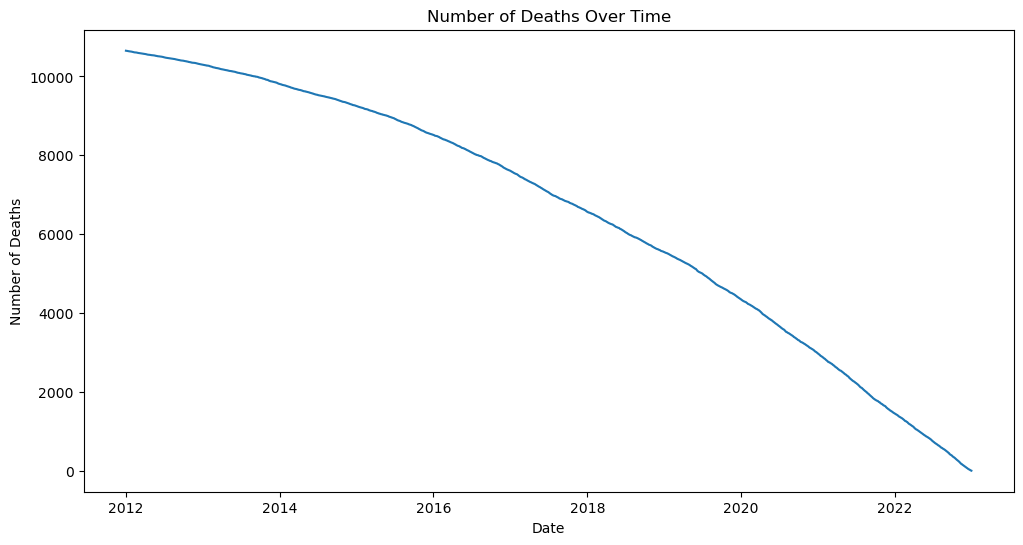

In [38]:
# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the DataFrame by the 'Date' column
df.sort_values('Date', inplace=True)

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y=df.index, data=df)
plt.title('Number of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')

# Save the graph as an image file
plt.savefig('Deaths_over_time(Date).png')

plt.show()

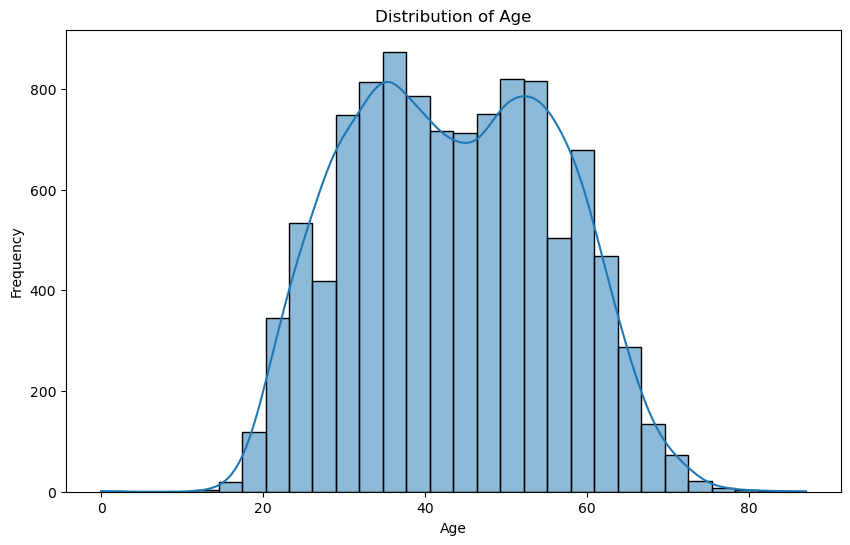

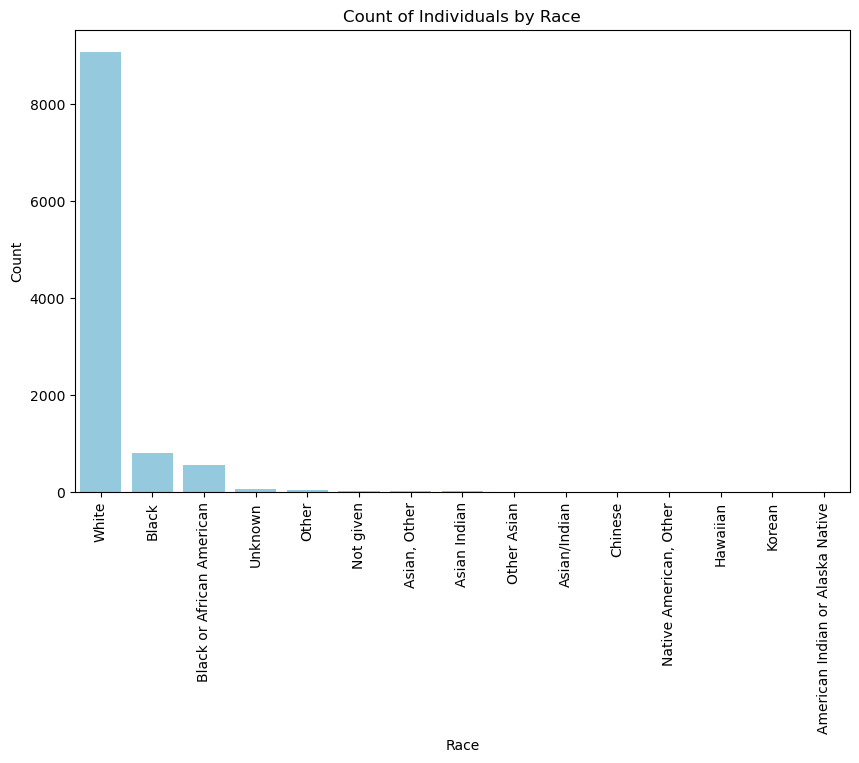

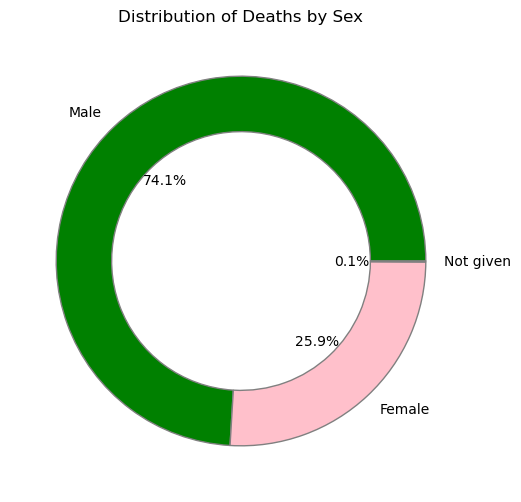

In [39]:
# Visualize Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Save the graph as an image file
plt.savefig('Distribution_of_Age.png')

plt.show()



# Visualize the count of different races
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index, color='skyblue')
plt.title('Count of Individuals by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.savefig('Individuals_by_Race.png')

plt.show()


# Visualize the count of deaths by Sex with different colors for each gender
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['green', 'pink','violet'], wedgeprops=dict(width=0.3, edgecolor='gray'))
plt.title('Distribution of Deaths by Sex')

plt.savefig('Distribution_Deaths_by_Sex.png')

plt.show()




## Part 2 : Count of Individuals by Location

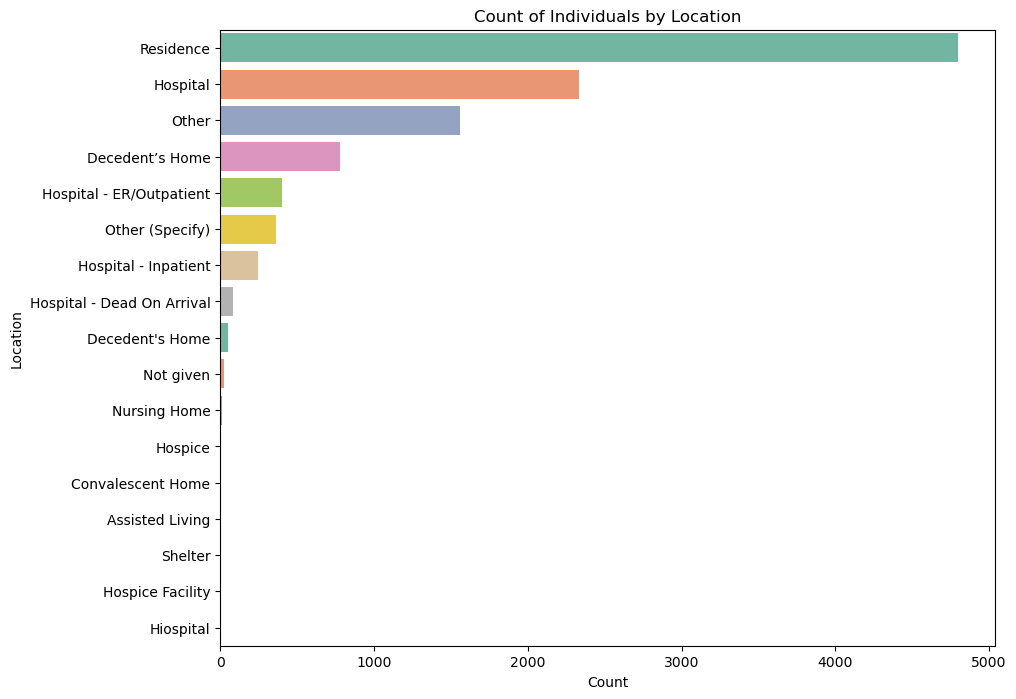

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 8))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index, palette='Set2')
plt.title('Count of Individuals by Location')
plt.ylabel('Location')
plt.xlabel('Count')

plt.savefig('Count_Individuals_Location.png')
plt.show()




## Part 3 : Type of Drug Distribution 

In [41]:
# List of categorical columns
categorical_columns = ['Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue',
                        'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
                        'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
                        'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid']

# Create a new DataFrame for numerical representation
numerical_df = pd.DataFrame()

# Convert categorical columns to numerical
for column in categorical_columns:
    numerical_df[column] = df[column].apply(lambda x: 1 if x == 'Y' else 0)

# Display the resulting numerical DataFrame
print(numerical_df.head())

print(numerical_df.info())

       Heroin  Heroin death certificate (DC)  Cocaine  Fentanyl  \
10653       1                              0        1         0   
10652       1                              0        0         0   
10651       0                              0        1         0   
10650       0                              0        0         0   
10649       1                              0        0         0   

       Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  \
10653                  0          0            0        0            0   
10652                  0          0            0        0            0   
10651                  0          0            0        0            0   
10650                  0          0            0        0            0   
10649                  0          0            0        0            0   

       Benzodiazepine  ...  Amphet  Tramad  Hydromorphone  \
10653               0  ...       0       0              0   
10652               1  ...    

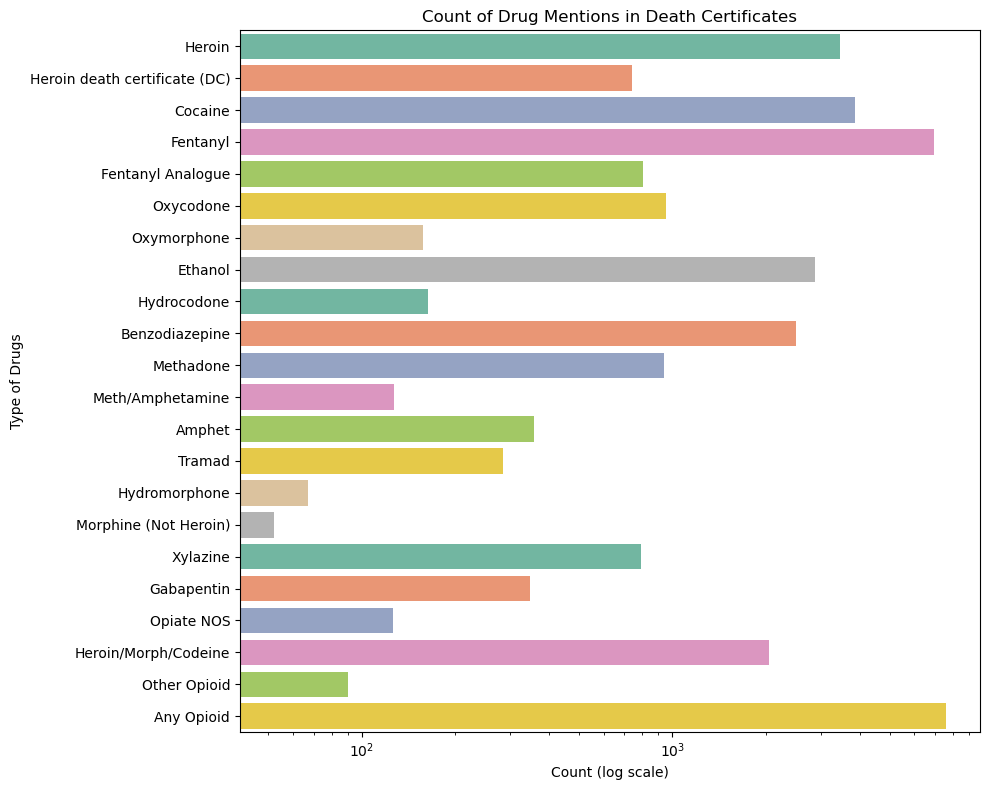

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate the drug_counts just in case
drug_counts = drug_data.sum()

# Convert Series to DataFrame
drug_counts_df = drug_counts.reset_index()
drug_counts_df.columns = ['Drug', 'Count']

# Convert Count column to numeric and drop any bad rows
drug_counts_df['Count'] = pd.to_numeric(drug_counts_df['Count'], errors='coerce')
drug_counts_df = drug_counts_df.dropna()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=drug_counts_df, x='Count', y='Drug', palette='Set2')  # Changed palette
plt.xscale('log')
plt.title('Count of Drug Mentions in Death Certificates')
plt.xlabel('Count (log scale)')
plt.ylabel('Type of Drugs')

plt.tight_layout()
plt.savefig('Drugs_Analysis_Graph.png')
plt.show()
